# Goals

This notebook follows Shweta's practical on microarray data analysis. 

In [1]:
version

               _                           
platform       x86_64-apple-darwin15.5.0   
arch           x86_64                      
os             darwin15.5.0                
system         x86_64, darwin15.5.0        
status                                     
major          3                           
minor          3.1                         
year           2016                        
month          06                          
day            21                          
svn rev        70800                       
language       R                           
version.string R version 3.3.1 (2016-06-21)
nickname       Bug in Your Hair            

# Day 1

Downloading data:

- http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse9633
- use FTP directory for [GSE9633](ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE9nnn/GSE9633) to download  ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE9nnn/GSE9633/suppl/GSE9633_RAW.tar

Run this to install bioconductory and the affymetrix package on the first time only:

```r
source("https://bioconductor.org/biocLite.R")
biocLite("affy")
```

In [8]:
getwd()
pData = read.csv('GSE9633_samples.csv', row.names=1)
pData

[1] "/Users/cthoyt/dev/notebooks/bit/lskd"

,name,class
GSM243480,prostatic cell line PC3,sensitive
GSM243481,prostatic cell line DU145,sensitive
GSM243482,prostatic cell line LNCaP,sensitive
GSM243483,prostatic cell line 22Rv,resistant
GSM243484,prostatic cell line WPMY1,resistant
GSM243485,prostatic cell line VCaP,resistant
GSM243486,prostatic cell line MDAPCa2b,resistant
GSM243487,prostatic cell line HPV7,sensitive
GSM243488,prostatic cell line HPV10,sensitive
GSM243489,prostatic cell line RWPE1,sensitive


In [ ]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("lumi")

In [16]:
# needs installation biocLite("lumi")
library("affy")

In [9]:
setwd('GSE9633_RAW/')
getwd()

[1] "/Users/cthoyt/dev/notebooks/bit/lskd/GSE9633_RAW"

In [17]:
d = ReadAffy()
d

Warning message:
: missing cdf environment! in show(AffyBatch)Warning message:
: closing unused connection 5 (http://www.bioconductor.org/main.html)Warning message:
: replacing previous import ‘AnnotationDbi::tail’ by ‘utils::tail’ when loading ‘hgu133a2cdf’Warning message:
: replacing previous import ‘AnnotationDbi::head’ by ‘utils::head’ when loading ‘hgu133a2cdf’


AffyBatch object
size of arrays=732x732 features (23 kb)
cdf=HG-U133A_2 (??? affyids)
number of samples=16
number of genes=22277
annotation=hgu133a2
notes=

In [18]:
exprs = as.matrix(exprs(d))
colnames(exprs) = rownames(pData)

head(exprs)

,GSM243480,GSM243481,GSM243482,GSM243483,GSM243484,GSM243485,GSM243486,GSM243487,GSM243488,GSM243489,GSM243490,GSM243491,GSM243492,GSM243493,GSM243494,GSM243495
1,125,115,120,125,102,99,102,119,113,96,103,96,107,94,93,152
2,15153,8499,7223,15022,14903,12295,15707,13784,13385,10876,10072,13436,7975,9141,13871,11961
3,137,136,120,121,150,125,117,131,108,112,108,125,83,101,116,153
4,15746,10718,8300,15498,15971,13768,14968,14145,13385,11185,10948,13568,9222,9448,14346,11279
5,146,162,111,125,116,129,118,117,106,133,102,112,93,101,114,98
6,111,104,109,104,104,112,115,94,101,88,90,102,74,73,67,159


In [19]:
minimalSet = ExpressionSet(assayData=exprs)

In [20]:
summary(pData)

                        name          class   
 prostatic cell line 22Rv : 1   resistant: 5  
 prostatic cell line DU145: 1   sensitive:11  
 prostatic cell line DUCaP: 1                 
 prostatic cell line HPV10: 1                 
 prostatic cell line HPV7 : 1                 
 prostatic cell line LNCaP: 1                 
 (Other)                  :10                 

In [21]:
metadata = data.frame(labelDescription=c("cell line name", 'drug sensitivity'),
                     row.names=c('name', 'class'))

In [22]:
phenoData = new("AnnotatedDataFrame", data=pData, varMetadata=metadata)

In [23]:
eset = ExpressionSet(assayData=exprs, phenoData=phenoData)

In [24]:
rma(eset)

In [25]:
library(siggenes)

Loading required package: multtest
Loading required package: splines


In [26]:
data(golub)

golub.cl

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1

In [27]:
sam.out = sam(data=golub, cl=golub.cl, gene.names=golub.gnames[,3])

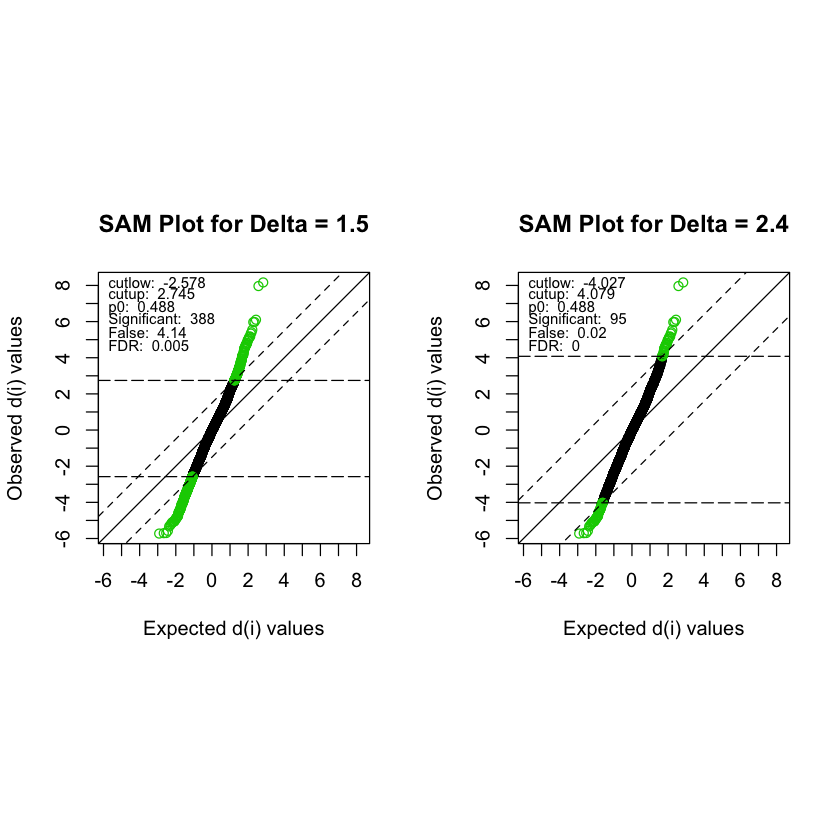

In [28]:
par(mfrow=c(1,2))
plot(sam.out, 1.5)
plot(sam.out, 2.4)

In [29]:
summary(sam.out, 2.25)

SAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
s0 = 0.0584  (The 0 % quantile of the s values.) 
 
 Number of permutations: 100  

 MEAN number of falsely called variables is computed.

Delta: 2.25
cutlow: -3.818
cutup: 3.898
p0: 0.488
Identified Genes: 111
Falsely Called Genes: 0.04
FDR: 0.000176


Identified Genes (using Delta = 2.25):

     Row d.value  stdev     rawp  q.value R.fold             Name
1    829    8.17 0.2958        0        0  7.423        M27891_at
2   2124    7.96 0.1779        0        0  3.684        X95735_at
3   2600    6.10 0.1911        0        0  2.873      L09209_s_at
4   2664    5.98 0.3919        0        0  6.455      Y00787_s_at
5    766    5.97 0.1731        0        0  2.607        M16038_at
6   2489   -5.73 0.2155        0        0  0.337 U22376_cds2_s_at
7    717   -5.70 0.2069        0        0  0.350        L47738_at
8   1995   -5.70 0.1933        0        0  0.370        X74262_at
9   2939   -5.58 0.1651        0     

In [30]:
sum.sam.out <- summary(sam.out, 3.3)

In [31]:
sum.sam.out@mat.sig

,Row,d.value,stdev,rawp,q.value,R.fold
M27891_at,829,8.165222,0.2958251,0,0,7.422684
X95735_at,2124,7.964784,0.1778697,0,0,3.684479
L09209_s_at,2600,6.102371,0.1911219,0,0,2.872660
Y00787_s_at,2664,5.975750,0.3918749,0,0,6.455137
M16038_at,766,5.970848,0.1731333,0,0,2.606597
M28130_rna1_s_at,2663,5.547021,0.4178283,0,0,6.239310


In [32]:
head(golub.gnames)

36,AFFX-HUMISGF3A/M97935_MA_at (endogenous control),AFFX-HUMISGF3A/M97935_MA_at
37,AFFX-HUMISGF3A/M97935_MB_at (endogenous control),AFFX-HUMISGF3A/M97935_MB_at
38,AFFX-HUMISGF3A/M97935_3_at (endogenous control),AFFX-HUMISGF3A/M97935_3_at
39,AFFX-HUMRGE/M10098_5_at (endogenous control),AFFX-HUMRGE/M10098_5_at
40,AFFX-HUMRGE/M10098_M_at (endogenous control),AFFX-HUMRGE/M10098_M_at
41,AFFX-HUMRGE/M10098_3_at (endogenous control),AFFX-HUMRGE/M10098_3_at


In [33]:
list.siggenes(sam.out, 2.25, gene.names=golub.gnames[,2])

In [34]:
findDelta(sam.out, 100)